loding the data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../data/togo-dapaong_qc.csv")
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


Missing Values handling

In [2]:
df.describe()
df.isna().sum()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

List columns with >5% nulls

In [3]:
(df.isna().sum() / len(df)) * 100

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

Outlier handling

In [4]:
from scipy.stats import zscore
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[numeric_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum()


In [5]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


saving the cleaned data

In [11]:
df.to_csv("../data/togo_clean.csv", index=False)


Time Series Plots

array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>],
      dtype=object)

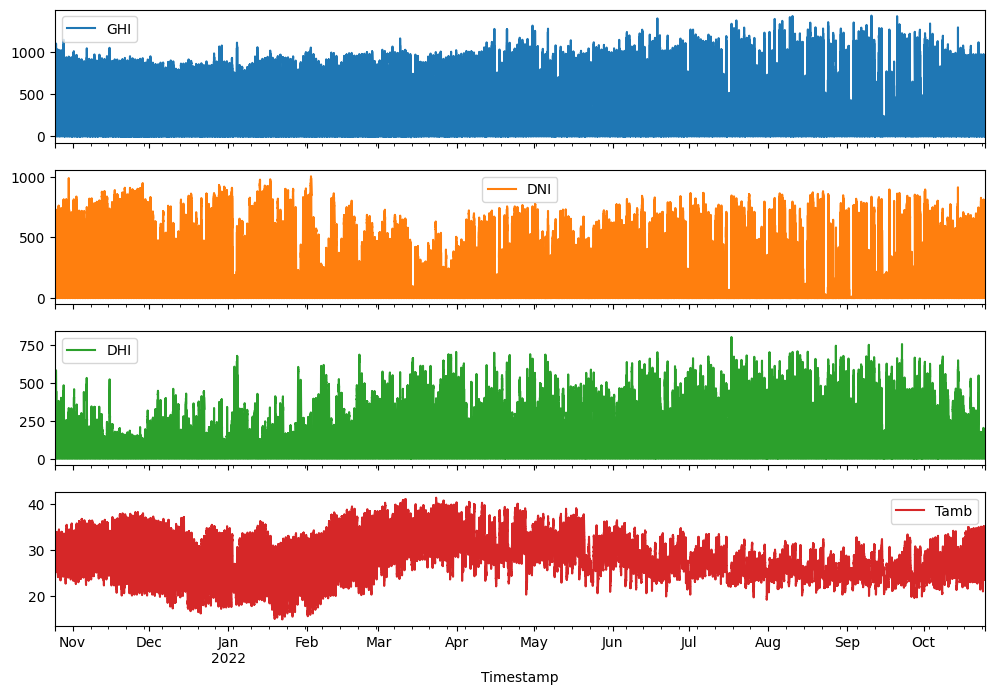

In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(12,8))


Cleaning Impact

<Axes: xlabel='Cleaning'>

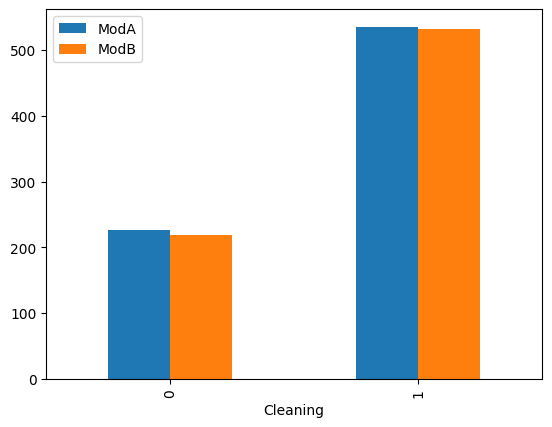

In [7]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')

Correlation

<Axes: >

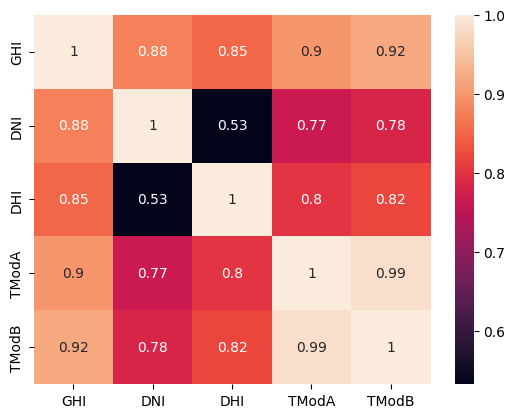

In [8]:
import seaborn as sns

sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True)


Scatter Plots

<Axes: xlabel='WS', ylabel='GHI'>

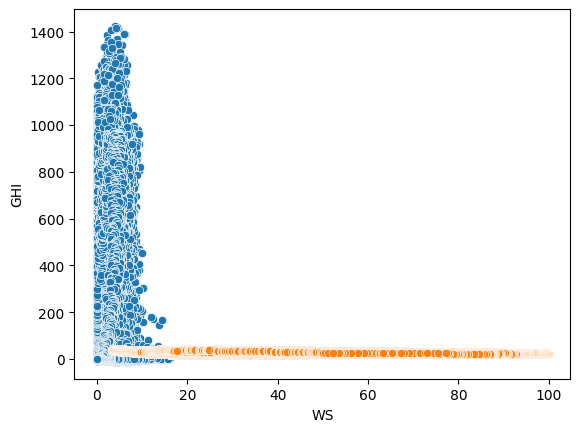

In [9]:
sns.scatterplot(data=df, x='WS', y='GHI')
sns.scatterplot(data=df, x='RH', y='Tamb')

Histogram & Wind Rose

<Axes: >

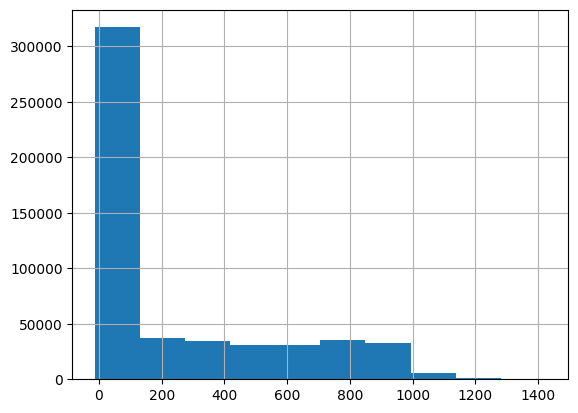

In [13]:
df['GHI'].hist()


Bubble Chart

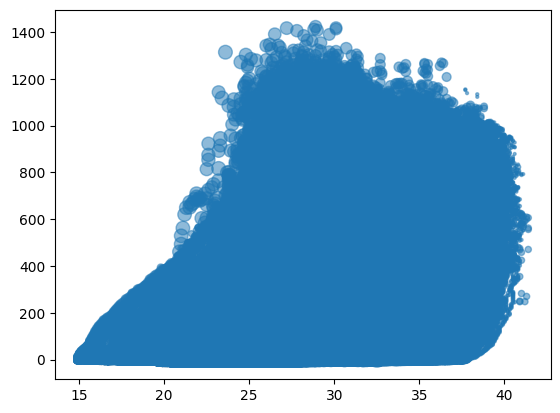

In [10]:
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.5)
